Written by:

Nikol Mulokandov, ID: 207296880

Yuval Dalbaha, ID: 209089838

# Part 1 - DNN Network
In this part of the code we will create a deep neural network (DNN) that classifies the dataset into  different labels in the best accuracy.

We chose to use the BLOODMINST dataset.

This data includes 17,092 images of 3 channels. The data is divided into 8 classes.

We normalized the pixel values to the range between 0 and 1, and divided the data to 3 datasets: train, val and test.

Next, we converted the images into a one-dimensional vector (flatten
).

After that, we build  the model with the following architecture:

First layer - 128 neurons and Relu activation function

Second layer - 64 neurons and Relu activation function

Third layer - SoftMax activation function for classification


In our opinion, we got pretty good results-The DNN converging to 80% accuracy area.

In [26]:
pip install medmnist

In [27]:
# importing packages for code :
import medmnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import  Adam
from keras.models import Sequential
from medmnist import INFO, Evaluator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [28]:
!python -m medmnist available #Checking available datasets

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
All available datasets:
	pathmnist       | PathMNIST       | Size: 28 (default), 64, 128, 224.
	chestmnist      | ChestMNIST      | Size: 28 (default), 64, 128, 224.
	dermamnist      | DermaMNIST      | Size: 28 (default), 64, 128, 224.
	octmnist        | OCTMNIST        | Size: 28 (default), 64, 128, 224.
	pneumoniamnist  | PneumoniaMNIST  | Size: 28 (default), 64, 128, 224.
	retinamnist     | RetinaMNIST     | Size: 28 (default), 64, 128, 224.
	breastmnist     | BreastMNIST     | Size: 28 (default), 64, 128, 224.
	bloodmnist      | BloodMNIST      | Size: 28 (default), 64, 128, 224.
	tissuemnist     | TissueMNIST     | Size: 28 (default), 64, 128, 224.
	organamnist     | OrganAMNIST     | Size: 28 (default), 64, 128, 224.
	organcmnist     | OrganCMNIST     | Size: 28 (default), 64, 128, 224.
	organsmnist     | OrganSMNIST     | Size: 28 (default), 64, 128, 224.
	organmnist3d    | OrganMNIST3D    | Size: 28 (default), 64.
	nodule

In [29]:
data_flag = 'bloodmnist'  #data_flag specifies which dataset to use- we used 'bloodmnist'.
download = True

info = INFO[data_flag]  # INFO contains metadata about the chosen dataset, such as task, number of channels, and number of classes.
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])
print(info)
print(task)
print("Number of channels in the dataset: ", n_channels)
print( "Number of classes (labels) in the datasen_classes:",n_classes )

{'python_class': 'BloodMNIST', 'description': 'The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.', 'url': 'https://zenodo.org/records/10519652/files/bloodmnist.npz?download=1', 'MD5': '7053d0359d879ad8a5505303e11de1dc', 'url_64': 'https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1', 'MD5_64': '2b94928a2ae4916078ca51e05b6b800b', 'url_128': 'https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1', 'MD5_128': 'adace1e0ed228fccda1f39692059dd4c', 'url_224': 'https://zenodo.org/records/10519652/files/bloodmnist_224.npz

In [30]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
data_dir = '/content/gdrive/MyDrive/PROJECT1/bloodmnist.npz'

Mounted at /content/gdrive



In this section of the code, we first load the dataset using NumPy's np.load function and then print out the keys of the loaded data to understand what arrays are stored in the dataset.
Once we have printed the keys, we proceed to extract various arrays of the dataset, using the corresponding keys.

Overall, this process enables us to understand the contents and structure of the dataset, which is essential for further analysis and processing.

In [31]:
my_data=np.load(data_dir)
print(my_data.keys())

train_images = my_data['train_images']
train_labels = my_data['train_labels']
test_images = my_data['test_images']
test_labels = my_data['test_labels']
val_images = my_data['val_images']
val_labels = my_data['val_labels']


print("Train images shape:", my_data['train_images'].shape)
print("Train labels shape:", my_data['train_labels'].shape)
print("Test images shape:", my_data['test_images'].shape)
print("Test labels shape:", my_data['test_labels'].shape)
print("Val images shape:", my_data['val_images'].shape)
print("Val labels shape:", my_data['val_labels'].shape)


Exception ignored in: <function NpzFile.__del__ at 0x7d02eee16ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 226, in __del__
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 221, in close
OSError: [Errno 107] Transport endpoint is not connected


KeysView(NpzFile '/content/gdrive/MyDrive/PROJECT1/bloodmnist.npz' with keys: train_images, train_labels, val_images, val_labels, test_images...)
Train images shape: (11959, 28, 28, 3)
Train labels shape: (11959, 1)
Test images shape: (3421, 28, 28, 3)
Test labels shape: (3421, 1)
Val images shape: (1712, 28, 28, 3)
Val labels shape: (1712, 1)


In [32]:

# Find the range of pixel values
min_pixel_value = min(train_images.min(), test_images.min(), val_images.min())
max_pixel_value = max(train_images.max(), test_images.max(), val_images.max())

print("Minimum pixel value:", min_pixel_value)
print("Maximum pixel value:", max_pixel_value)

Minimum pixel value: 0
Maximum pixel value: 255


In [33]:

# Normalize the pixel values to the range [0, 1]
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0
val_images_normalized = val_images / 255.0

min_pixel_value = min(train_images_normalized.min(), test_images_normalized.min(), val_images_normalized.min())
max_pixel_value = max(train_images_normalized.max(), test_images_normalized.max(), val_images_normalized.max())

print("Minimum pixel value:", min_pixel_value)
print("Maximum pixel value:", max_pixel_value)

Minimum pixel value: 0.0
Maximum pixel value: 1.0


In [34]:

# Create datasets from normalized images and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_normalized, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images_normalized, test_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images_normalized, val_labels))


print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

11959
3421
1712


Epoch 1/12
374/374 [==============================] - 4s 6ms/step - loss: 1.2391 - accuracy: 0.5435 - val_loss: 0.9111 - val_accuracy: 0.6688
Epoch 2/12
374/374 [==============================] - 2s 5ms/step - loss: 0.8894 - accuracy: 0.6776 - val_loss: 0.7765 - val_accuracy: 0.7272
Epoch 3/12
374/374 [==============================] - 2s 6ms/step - loss: 0.7865 - accuracy: 0.7131 - val_loss: 0.7129 - val_accuracy: 0.7442
Epoch 4/12
374/374 [==============================] - 3s 8ms/step - loss: 0.7299 - accuracy: 0.7349 - val_loss: 0.6391 - val_accuracy: 0.7780
Epoch 5/12
374/374 [==============================] - 3s 7ms/step - loss: 0.6789 - accuracy: 0.7527 - val_loss: 0.5913 - val_accuracy: 0.7961
Epoch 6/12
374/374 [==============================] - 2s 5ms/step - loss: 0.6361 - accuracy: 0.7642 - val_loss: 0.5459 - val_accuracy: 0.8154
Epoch 7/12
374/374 [==============================] - 2s 6ms/step - loss: 0.5992 - accuracy: 0.7777 - val_loss: 0.5194 - val_accuracy: 0.8183
Epoch 

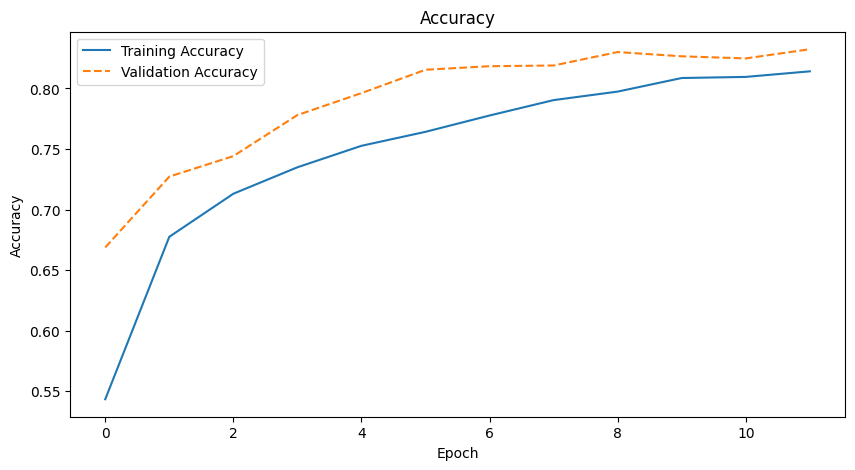

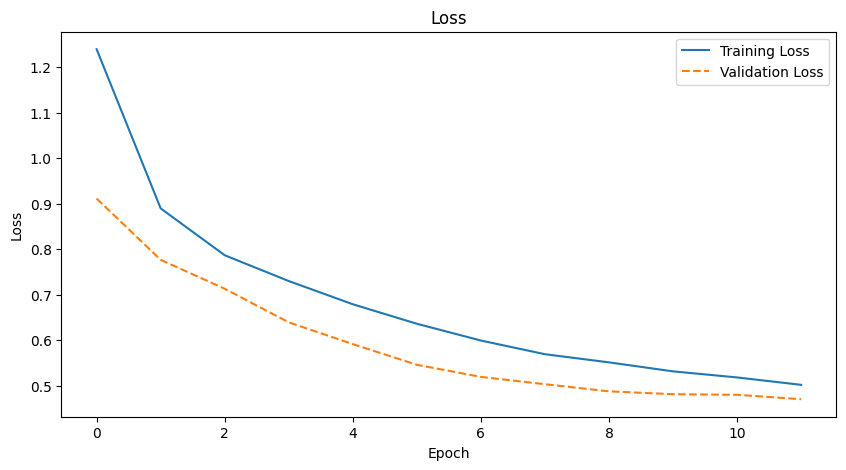

In [35]:
# Define the number of classes based on our dataset
num_classes = len(np.unique(train_labels))
epochs = 12
batch_size = 32

#DNN architecture
model = Sequential([
    layers.Flatten(input_shape=(28, 28, 3)),  # Flatten the 3D input images to 1D
    Dense(128, activation='relu'),           # Hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),            # Hidden layer with 64 units and ReLU activation
    Dense(num_classes, activation='softmax') # Output layer with softmax activation for classification
])

# Compile the model with 'Adam' optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(train_dataset.batch(batch_size), epochs=epochs, validation_data=val_dataset.batch(batch_size), verbose=1)


def plot_training_validation(history, metric='accuracy'):
    plt.figure(figsize=(10, 5))
    if metric == 'accuracy':
        plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
        plt.ylabel('Accuracy')
    elif metric == 'loss':
        plt.plot(history.history['loss'], label='Training Loss', linestyle='-')
        plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
        plt.ylabel('Loss')
    plt.title(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


plot_training_validation(history, metric='accuracy')
plot_training_validation(history, metric='loss')

We have obtained satisfactory results with the CNN model, achieving a convergence accuracy of 80%. The validation accuracy surpasses the training accuracy, and the validation loss is lower than the training loss, indicating that the model generalizes well to unseen data.

These observations suggest that overfitting is not present in the model.



107/107 [==============================] - 0s 2ms/step
Test Loss: 0.5176219344139099
Test Accuracy: 0.8120432496070862
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       244
           1       0.89      0.95      0.92       624
           2       0.83      0.82      0.82       311
           3       0.64      0.67      0.66       579
           4       0.93      0.57      0.71       243
           5       0.61      0.68      0.64       284
           6       0.89      0.88      0.89       666
           7       0.97      0.99      0.98       470

    accuracy                           0.81      3421
   macro avg       0.80      0.78      0.78      3421
weighted avg       0.82      0.81      0.81      3421

Confusion Matrix:
[[154   5   0  54   3  28   0   0]
 [  0 594   0  12   1   6  11   0]
 [  3   1 255  17   2   4  14  15]
 [ 41  26   4 388   4  79  37   0]
 [ 16   1  38  39 139   2   8   0]
 [ 13   6   1 

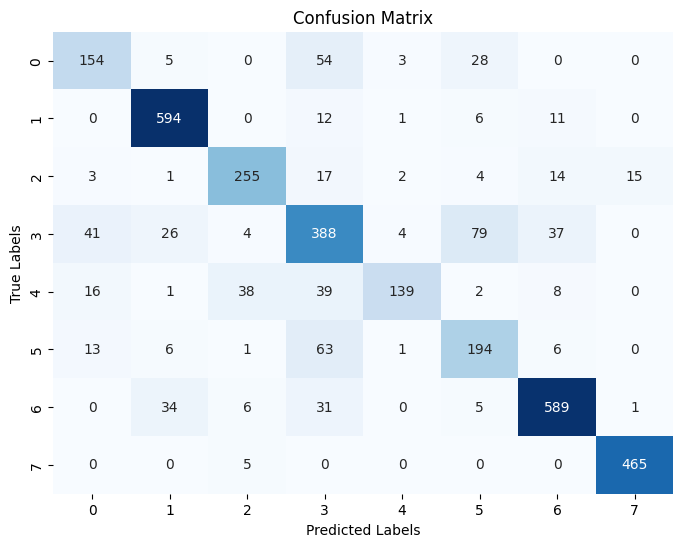

In [36]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset.batch(batch_size), verbose=0)

# Obtain predictions for the test set
predictions = np.argmax(model.predict(test_dataset.batch(batch_size)), axis=-1)

# Calculate classification report
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(classification_report(test_labels, predictions))

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The resuls on the test dataset :

Test Loss: 0.5176219344139099

Test Accuracy: 0.8120432496070862

The test results are close to the train and validation result, so we can say our moudle is reliable.

# Part 2 - CNN Network
In this part of the code we will create a convolutional neural network (CNN) that classifies the database into the different labels in the best accuracy.

we build the model with the following architecture:

*   Two convolutional layers, each followed by a MaxPooling layer, to extract features from the input images.
*   The output of the convolutional layers is flattened into a 1D vector.
*   The flattened vector is passed through a dense layer with 128 neurons and a ReLU activation function to learn complex patterns in the data.
*  Dropout layers with a dropout rate of 0.3 are added after the dense layers to prevent overfitting by randomly deactivating neurons during training.  
*  Finally, a dense layer with the softmax activation function is added for classification into multiple classes.


We compile the model using the Adam optimizer and sparse categorical cross-entropy as the loss function.

Epoch 1/20
187/187 [==============================] - 2s 6ms/step - loss: 1.2151 - accuracy: 0.5454 - val_loss: 0.7578 - val_accuracy: 0.7331
Epoch 2/20
187/187 [==============================] - 1s 7ms/step - loss: 0.7960 - accuracy: 0.7109 - val_loss: 0.6242 - val_accuracy: 0.7675
Epoch 3/20
187/187 [==============================] - 1s 5ms/step - loss: 0.6556 - accuracy: 0.7602 - val_loss: 0.5348 - val_accuracy: 0.8055
Epoch 4/20
187/187 [==============================] - 1s 5ms/step - loss: 0.5805 - accuracy: 0.7943 - val_loss: 0.5033 - val_accuracy: 0.8207
Epoch 5/20
187/187 [==============================] - 1s 4ms/step - loss: 0.5357 - accuracy: 0.8108 - val_loss: 0.4248 - val_accuracy: 0.8452
Epoch 6/20
187/187 [==============================] - 1s 4ms/step - loss: 0.4935 - accuracy: 0.8218 - val_loss: 0.4083 - val_accuracy: 0.8475
Epoch 7/20
187/187 [==============================] - 1s 4ms/step - loss: 0.4706 - accuracy: 0.8283 - val_loss: 0.3611 - val_accuracy: 0.8697
Epoch 

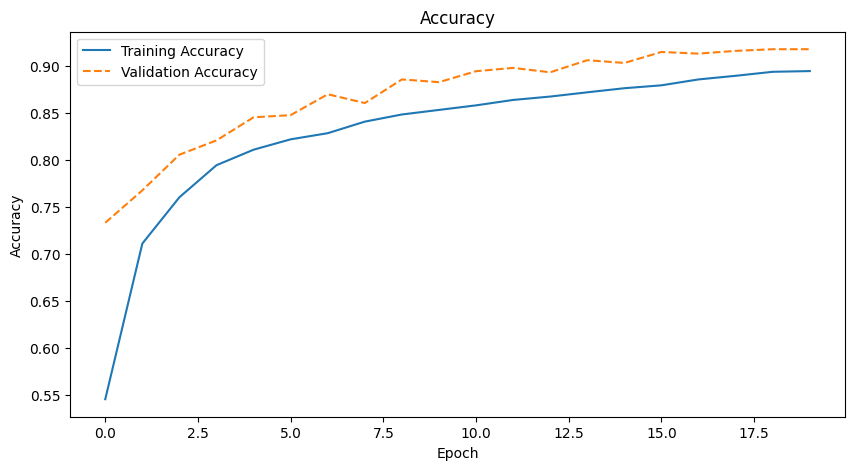

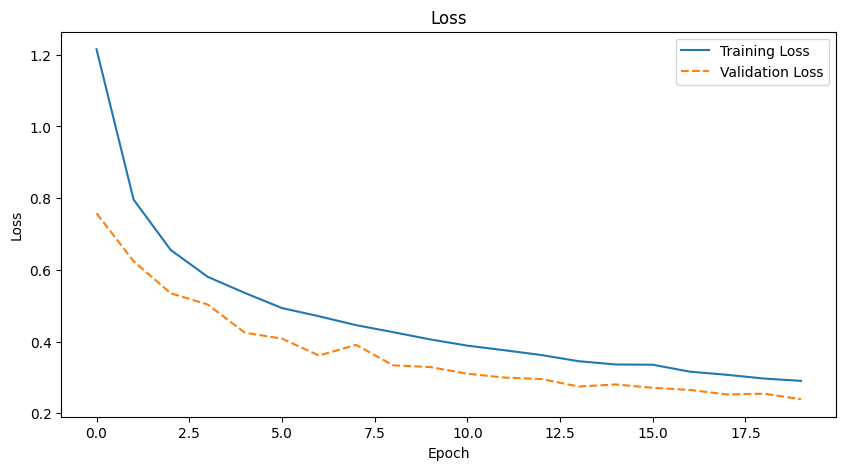

In [41]:
#Define the number of classes, epochs, and batch size for training the model
num_classes = len(np.unique(train_labels))
epochs = 20
batch_size = 64


# CNN architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    layers.Dropout(0.3),
    Dense(128, activation='relu'),
    layers.Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model with the Adam optimizer
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(train_dataset.batch(batch_size), epochs=epochs, validation_data=val_dataset.batch(batch_size), verbose=1)

def plot_training_validation(history, metric='accuracy'):
    plt.figure(figsize=(10, 5))
    if metric == 'accuracy':
        plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
        plt.ylabel('Accuracy')
    elif metric == 'loss':
        plt.plot(history.history['loss'], label='Training Loss', linestyle='-')
        plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
        plt.ylabel('Loss')
    plt.title(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_training_validation(history, metric='accuracy')
plot_training_validation(history, metric='loss')

We have achieved promising results with the CNN model, achieving a convergence accuracy of 90%.

Notably, the validation accuracy surpasses the training accuracy, indicating the model's ability to generalize well to unseen data. Moreover, the validation loss is lower than the training loss, suggesting effective learning and generalization capabilities of the model. Overall, these outcomes signify successful training and indicate the absence of overfitting issues.







54/54 [==============================] - 0s 2ms/step
Test Loss: 0.2651752233505249
Test Accuracy: 0.9009061455726624
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       244
           1       0.99      0.96      0.98       624
           2       0.97      0.86      0.91       311
           3       0.82      0.74      0.78       579
           4       0.85      0.94      0.89       243
           5       0.76      0.84      0.80       284
           6       0.95      0.97      0.96       666
           7       0.99      1.00      0.99       470

    accuracy                           0.90      3421
   macro avg       0.88      0.89      0.89      3421
weighted avg       0.90      0.90      0.90      3421

Confusion Matrix:
[[206   1   0  19   4  13   1   0]
 [  6 601   0   3   1   4   9   0]
 [  4   1 267  19   8   4   5   3]
 [ 57   3   3 427  19  53  17   0]
 [  1   0   2   8 229   2   1   0]
 [ 11   0   0  2

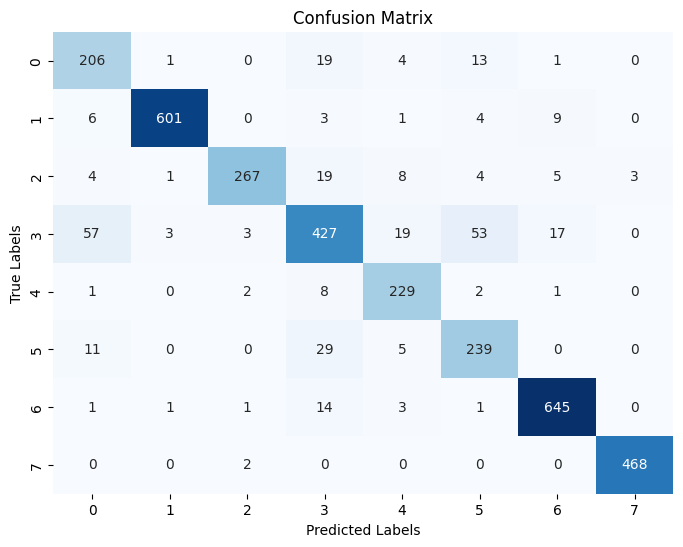

In [42]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset.batch(batch_size), verbose=0)

# Obtain predictions for the test set
predictions = np.argmax(model.predict(test_dataset.batch(batch_size)), axis=-1)

# Calculate classification report
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Classification Report:")
print(classification_report(test_labels, predictions))

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The resuls on the test dataset :

Test Loss: 0.2651752233505249

Test Accuracy: 0.9009061455726624


The test results are close to the train and validation result, so we can say our moudle is reliable.

### In this section we will examine the effect of the various activation functions on the model.

Epoch 1/20
187/187 [==============================] - 4s 9ms/step - loss: 0.9986 - accuracy: 0.6404 - val_loss: 0.5974 - val_accuracy: 0.7833
Epoch 2/20
187/187 [==============================] - 1s 7ms/step - loss: 0.6256 - accuracy: 0.7797 - val_loss: 0.4745 - val_accuracy: 0.8218
Epoch 3/20
187/187 [==============================] - 1s 5ms/step - loss: 0.5341 - accuracy: 0.8121 - val_loss: 0.4410 - val_accuracy: 0.8376
Epoch 4/20
187/187 [==============================] - 2s 9ms/step - loss: 0.4719 - accuracy: 0.8334 - val_loss: 0.3737 - val_accuracy: 0.8721
Epoch 5/20
187/187 [==============================] - 2s 13ms/step - loss: 0.4318 - accuracy: 0.8456 - val_loss: 0.3553 - val_accuracy: 0.8744
Epoch 6/20
187/187 [==============================] - 2s 10ms/step - loss: 0.4142 - accuracy: 0.8531 - val_loss: 0.3258 - val_accuracy: 0.8914
Epoch 7/20
187/187 [==============================] - 1s 8ms/step - loss: 0.3814 - accuracy: 0.8641 - val_loss: 0.3030 - val_accuracy: 0.8978
Epoc

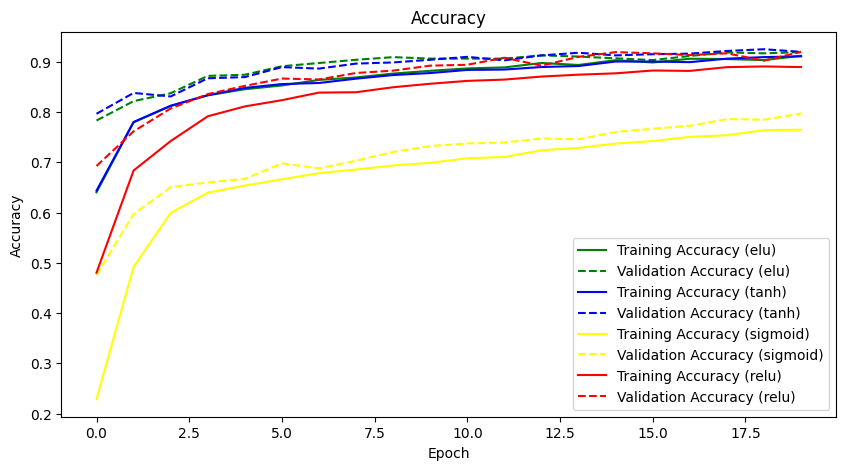

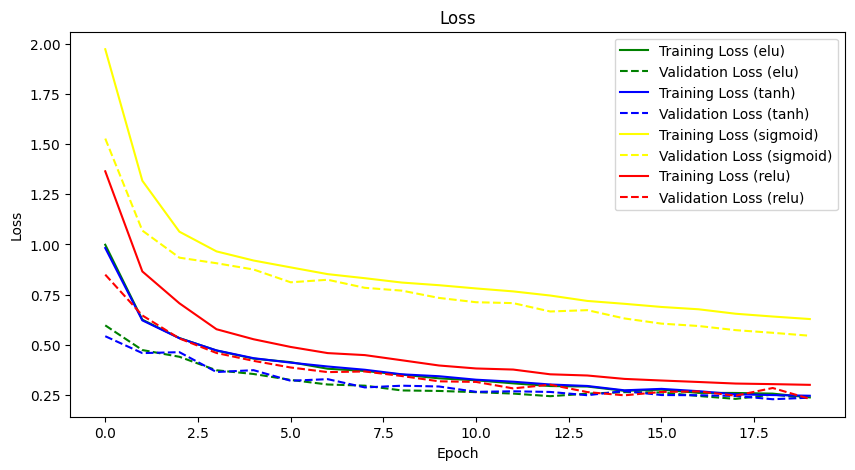

In [45]:
#Define the number of classes, epochs, and batch size for training the model.
num_classes = len(np.unique(train_labels))
epochs = 20
batch_size = 64

# Activation functions to iterate over
activation_functions = ['elu', 'tanh', 'sigmoid', 'relu']

# Dictionary to store the colors for each activation function
activation_colors = {'elu': 'green', 'tanh': 'blue', 'sigmoid': 'yellow', 'relu': 'red'}

# Dictionary to store the training history for each activation function
activation_history = {}

for activation_func in activation_functions:
    #  CNN architecture
    model = Sequential([
        Conv2D(64, (3, 3), activation=activation_func, input_shape=(28, 28, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation=activation_func),
        MaxPooling2D((2, 2)),
        Flatten(),
        layers.Dropout(0.3),
        Dense(128, activation=activation_func),
        layers.Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model with  'Adam' optimizer
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model and store the training history
    history = model.fit(train_dataset.batch(batch_size), epochs=epochs, validation_data=val_dataset.batch(batch_size), verbose=1)

    # Store the training history in the dictionary
    activation_history[activation_func] = history

def plot_training_validation(activation_history, activation_colors, metric='accuracy'):
    plt.figure(figsize=(10, 5))
    for activation_func, color in activation_colors.items():
        history = activation_history[activation_func]
        if metric == 'accuracy':
            plt.plot(history.history['accuracy'], label='Training Accuracy (' + activation_func + ')', linestyle='-', color=color)
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy (' + activation_func + ')', linestyle='--', color=color)
            plt.ylabel('Accuracy')
        elif metric == 'loss':
            plt.plot(history.history['loss'], label='Training Loss (' + activation_func + ')', linestyle='-', color=color)
            plt.plot(history.history['val_loss'], label='Validation Loss (' + activation_func + ')', linestyle='--', color=color)
            plt.ylabel('Loss')
    plt.title(metric.capitalize())
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


plot_training_validation(activation_history, activation_colors, metric='accuracy')
plot_training_validation(activation_history, activation_colors, metric='loss')

Analysis of Accuracy and Loss Function Results:

The models utilizing relu, elu, and tanh activation functions exhibit similar and highest accuracy, outperforming the model using the sigmoid function.

 In terms of loss, relu, tanh, and elu also demonstrate the lowest loss values, while the sigmoid function yields the highest loss.

 Overall, relu, tanh, and elu activation functions perform comparably well, showcasing superior performance compared to sigmoid.
